In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [292]:
ippu_original_file_energy = pd.read_csv("Industrial_Product_and_Process_Use_data.csv")

In [293]:
# Filter the DataFrame to keep only rows where 'Gas' is equal to 'CO2e (t) GWP-AR2'
filtered_df = ippu_original_file_energy[ippu_original_file_energy['Gas'] == 'CO2e (t) GWP-AR2']

# Save the filtered DataFrame to a new CSV file
output_file_name = 'ippu_filtered_CO2e_GWP_AR2.csv'
filtered_df.to_csv(output_file_name, index=False)

print(f"Filtered data saved to {output_file_name}")


Filtered data saved to ippu_filtered_CO2e_GWP_AR2.csv


In [294]:
ippu_filtered_gwp_ar2 = pd.read_csv("ippu_filtered_CO2e_GWP_AR2.csv")

In [295]:
ippu_filtered_gwp_ar2

,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Emission / Removal / Bunker,Gas,State,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Industrial Product and Process Use,Chemical Industry,Acrylonitrile,-,-,-,NaN,Emissions,CO2e (t) GWP-AR2,Gujarat,...,172080,184030,154155,175665,182835,181640,163715,172080,166105,47800
1,Industrial Product and Process Use,Chemical Industry,Ammonia Production,Ammonia Production,-,-,NaN,Emissions,CO2e (t) GWP-AR2,Andhra Pradesh,...,677416,667904,665660,696042,725309,734289,749996,758449,756350,802666
2,Industrial Product and Process Use,Chemical Industry,Ammonia Production,Ammonia Production,-,-,NaN,Emissions,CO2e (t) GWP-AR2,Gujarat,...,6620014,6527065,6505128,6802039,7088045,7175807,7329298,7411912,7391399,7844021
3,Industrial Product and Process Use,Chemical Industry,Ammonia Production,Ammonia Production,-,-,NaN,Emissions,CO2e (t) GWP-AR2,Kerala,...,849812,837880,835064,873178,909893,921159,940863,951468,948835,1006938
4,Industrial Product and Process Use,Chemical Industry,Ammonia Production,Ammonia Production,-,-,NaN,Emissions,CO2e (t) GWP-AR2,Maharashtra,...,1511002,1489787,1484780,1552549,1617829,1637860,1672894,1691751,1687069,1790379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Industrial Product and Process Use,Non-Energy Products from Fuels and Solvent Use,Paraffin Wax Use,-,-,-,NaN,Emissions,CO2e (t) GWP-AR2,Tamil Nadu,...,116729,49012,108481,69508,45485,77367,53119,45312,68185,72143
445,Industrial Product and Process Use,Non-Energy Products from Fuels and Solvent Use,Paraffin Wax Use,-,-,-,NaN,Emissions,CO2e (t) GWP-AR2,Telangana,...,0,0,0,0,0,0,8980,2993,74750,25436
446,Industrial Product and Process Use,Non-Energy Products from Fuels and Solvent Use,Paraffin Wax Use,-,-,-,NaN,Emissions,CO2e (t) GWP-AR2,Uttar Pradesh,...,5247,1107,123,5091,74137,121152,57521,43480,18789,3212
447,Industrial Product and Process Use,Non-Energy Products from Fuels and Solvent Use,Paraffin Wax Use,-,-,-,NaN,Emissions,CO2e (t) GWP-AR2,Uttarakhand,...,3987,4626,2216,7107,13162,10126,30483,29507,29216,36054


In [417]:
import pandas as pd

# Assuming the data is loaded into a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file, load it first

# For now, I'm assuming 'df' is already loaded with your data

# Select only the columns 'State' and emissions for 2010
# We're assuming that all the emissions columns are in a specific column like '2010'
emissions_2010 = ippu_filtered_gwp_ar2[['State', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Remove rows with missing emissions values for 2010
emissions_2010 = emissions_2010.dropna(subset=['2010'])

# Sum the emissions for all categories for each state for the year 2010
state_emissions_2010 = emissions_2010.groupby('State')['2010'].sum()

# Sort the states by total emissions in 2010 in descending order
top_states_2010 = state_emissions_2010.sort_values(ascending=False)



top_states_2010_ippu = top_states_2010

# Add a new column 'energy_values' with the same values as the sorted emissions
top_states_2010_ippu_df = top_states_2010.reset_index()  # Convert the Series to a DataFrame
top_states_2010_ippu_df.columns = ['State', 'ippu_values']  # Rename columns

# Save the DataFrame to a CSV file
top_states_2010_ippu_df.to_csv('top_states_2010_ippu.csv', index=False)

# Display a confirmation message
print("Data saved to 'top_states_2010_ippu.csv'.")


Data saved to 'top_states_2010_ippu.csv'.


In [296]:



# List of columns representing the years 2005 to 2015
year_columns = [str(year) for year in range(2005, 2016)]

# Dictionary to store results for each category
category_sums = {}

# Calculate the summation for each category in 'Level 1'
for category in ippu_filtered_gwp_ar2['Level 2'].unique():
    # Filter rows for the current category
    category_df = ippu_filtered_gwp_ar2[ippu_filtered_gwp_ar2['Level 2'] == category]
    
    # Sum emissions for each year
    category_sums[category] = category_df[year_columns].sum()

# Convert the dictionary to a DataFrame for easier display and export
category_sums_df = pd.DataFrame(category_sums, index=year_columns).transpose()

# Add a row for the final summation for all categories
category_sums_df.loc['Total'] = category_sums_df.sum()

# Display the results
print(category_sums_df)

# Save the results to a CSV file
category_sums_df.to_csv('ippu_yearly_emissions_by_category_level2_and_total.csv')
print("Yearly emissions by category and totals saved to 'ippu_yearly_emissions_by_category_level2_and_total.csv'")

                                                    2005      2006      2007  \
Chemical Industry                               31749473  32127208  32685357   
Metal Industry                                   6951830   7710422   7774730   
Mineral Industry                                59484191  63757253  68295359   
Non-Energy Products from Fuels and Solvent Use   3314237   3297276   3601026   
Total                                          101499731 106892159 112356472   

                                                    2008      2009      2010  \
Chemical Industry                               32516113  34518671  37028371   
Metal Industry                                   9092335   9191629   9688064   
Mineral Industry                                74146313  81549796  89523325   
Non-Energy Products from Fuels and Solvent Use   3355018   3547425   4631797   
Total                                          119109778 128807521 140871557   

                                      

In [297]:
ippu_yearly_emissions_by_category_level2_and_total = pd.read_csv('ippu_yearly_emissions_by_category_level2_and_total.csv')

In [298]:
# Rename the unnamed column (assuming it's the first column)
ippu_yearly_emissions_by_category_level2_and_total = ippu_yearly_emissions_by_category_level2_and_total.rename(columns={ippu_yearly_emissions_by_category_level2_and_total.columns[0]: 'Category'})
ippu_yearly_emissions_by_category_level2_and_total

,Category,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Chemical Industry,31749473,32127208,32685357,32516113,34518671,37028371,39369302,39082352,38952038,38849107,40974594
1,Metal Industry,6951830,7710422,7774730,9092335,9191629,9688064,16930635,16819504,11251505,10991171,12577068
2,Mineral Industry,59484191,63757253,68295359,74146313,81549796,89523325,93113858,94559799,103645166,116217487,115969589
3,Non-Energy Products from Fuels and Solvent Use,3314237,3297276,3601026,3355018,3547425,4631797,5158660,5185113,4863007,6792097,5853531
4,Total,101499731,106892159,112356472,119109778,128807521,140871557,154572456,155646768,158711716,172849862,175374782


In [299]:
from matplotlib.ticker import FixedLocator, FixedFormatter

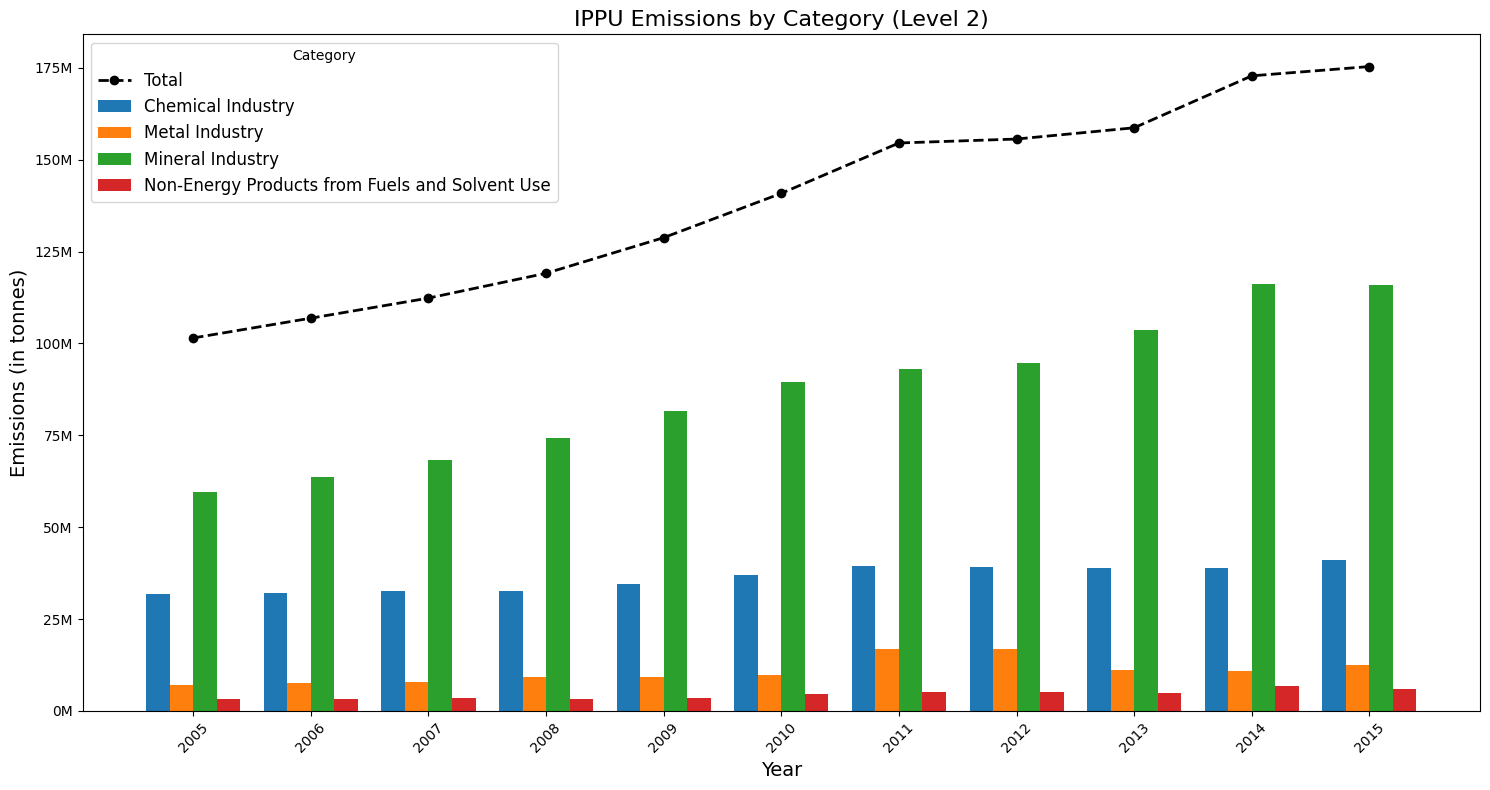

In [435]:
import matplotlib.pyplot as plt

# Remove the 'Total' row for category-based plotting
category_df = ippu_yearly_emissions_by_category_level2_and_total[
    ippu_yearly_emissions_by_category_level2_and_total['Category'] != 'Total'
]

# Extract the "Total" row for line plotting
total_emissions = ippu_yearly_emissions_by_category_level2_and_total[
    ippu_yearly_emissions_by_category_level2_and_total['Category'] == 'Total'
]

# List of years
years = [str(year) for year in range(2005, 2016)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Bar width
bar_width = 0.2
x_indexes = range(len(years))

# Iterate through each category and plot its bars
for i, category in enumerate(category_df['Category']):
    ax.bar(
        [x + i * bar_width for x in x_indexes],  # Offset bars for each category
        category_df.loc[category_df['Category'] == category, years].values.flatten(),
        width=bar_width,
        label=category
    )

# Plot the total emissions as a line
ax.plot(
    [x + 1.5 * bar_width for x in x_indexes],  # Align with the center of grouped bars
    total_emissions[years].values.flatten(),
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("IPPU Emissions by Category (Level 2)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Emissions (in tonnes)", fontsize=14)
ax.set_xticks([x + 1.5 * bar_width for x in x_indexes])  # Center labels
ax.set_xticklabels(years, rotation=45)

# Automatically scale the y-axis based on data
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Format as '100M', '200M', etc.

# Add legend
ax.legend(title="Category", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [314]:
# List of columns representing the years 2005 to 2015
year_columns = [str(year) for year in range(2005, 2016)]

# Filter for 'Level 2' = 'Mineral Industry'
ippu_mineral_industry_df = ippu_filtered_gwp_ar2[ippu_filtered_gwp_ar2['Level 2'] == 'Mineral Industry']

# Dictionary to store results for each Level 3 category under Level 2 = 'Mineral Industry'
ippu_mineral_industry_sums = {}

# Calculate the summation for each Level 3 category
for category in ippu_mineral_industry_df['Level 3'].unique():
    # Filter rows for the current Level 3 category
    category_data = ippu_mineral_industry_df[ippu_mineral_industry_df['Level 3'] == category]
    
    # Sum emissions for each year
    ippu_mineral_industry_sums[category] = category_data[year_columns].sum()

# Convert the dictionary to a DataFrame for easier display and export
ippu_mineral_industry_sums_df = pd.DataFrame(ippu_mineral_industry_sums, index=year_columns).transpose()

# Add a row for the final summation for all Level 3 categories
ippu_mineral_industry_sums_df.loc['Total'] = ippu_mineral_industry_sums_df.sum()

# Display the results
print(ippu_mineral_industry_sums_df)

# Save the results to a CSV file
ippu_mineral_industry_sums_df.to_csv('ippu_mineral_industry_emissions_by_category_and_total.csv')
print("Emissions for 'Mineral Industry' by category and totals saved to 'ippu_mineral_industry_emissions_by_category_and_total.csv'")


                                          2005     2006     2007     2008  \
Cement Production                     58362919 62227372 66591021 72743711   
Ceramics                                    57      264   105823   122475   
Glass Production                        323667   647624   417788   224289   
Lime Production                         733819   809656  1060857   978348   
Non Metallurgical Magnesia Production      317     2313    39660    13339   
Other Process Uses of Carbonates          7000     4745     6982     8036   
Other Uses of Soda Ash                   56413    65280    73229    56115   
Total                                 59484191 63757253 68295359 74146313   

                                          2009     2010     2011     2012  \
Cement Production                     80216990 85443112 90756154 93497370   
Ceramics                                 74101    18456    31707    14627   
Glass Production                        184369  2954762  1266832   417930  

In [315]:
ippu_mineral_industry_yearly_emissions = pd.read_csv('ippu_mineral_industry_emissions_by_category_and_total.csv')

In [316]:
# Rename the unnamed column (assuming it's the first column)
ippu_mineral_industry_yearly_emissions = ippu_mineral_industry_yearly_emissions.rename(columns={ippu_mineral_industry_yearly_emissions.columns[0]: 'Category'})
ippu_mineral_industry_yearly_emissions

,Category,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Cement Production,58362919,62227372,66591021,72743711,80216990,85443112,90756154,93497370,100420166,108833422,112681442
1,Ceramics,57,264,105823,122475,74101,18456,31707,14627,148491,231970,105483
2,Glass Production,323667,647624,417788,224289,184369,2954762,1266832,417930,1075916,583608,345437
3,Lime Production,733819,809656,1060857,978348,1005694,1020229,972264,516002,1893024,1246140,965953
4,Non Metallurgical Magnesia Production,317,2313,39660,13339,507,182,22,1156,2320,1116,513
5,Other Process Uses of Carbonates,7000,4745,6982,8036,8701,9624,8352,3524,5242,6734,10657
6,Other Uses of Soda Ash,56413,65280,73229,56115,59433,76959,78528,109190,100007,5314495,1860104
7,Total,59484191,63757253,68295359,74146313,81549796,89523325,93113858,94559799,103645166,116217487,115969589


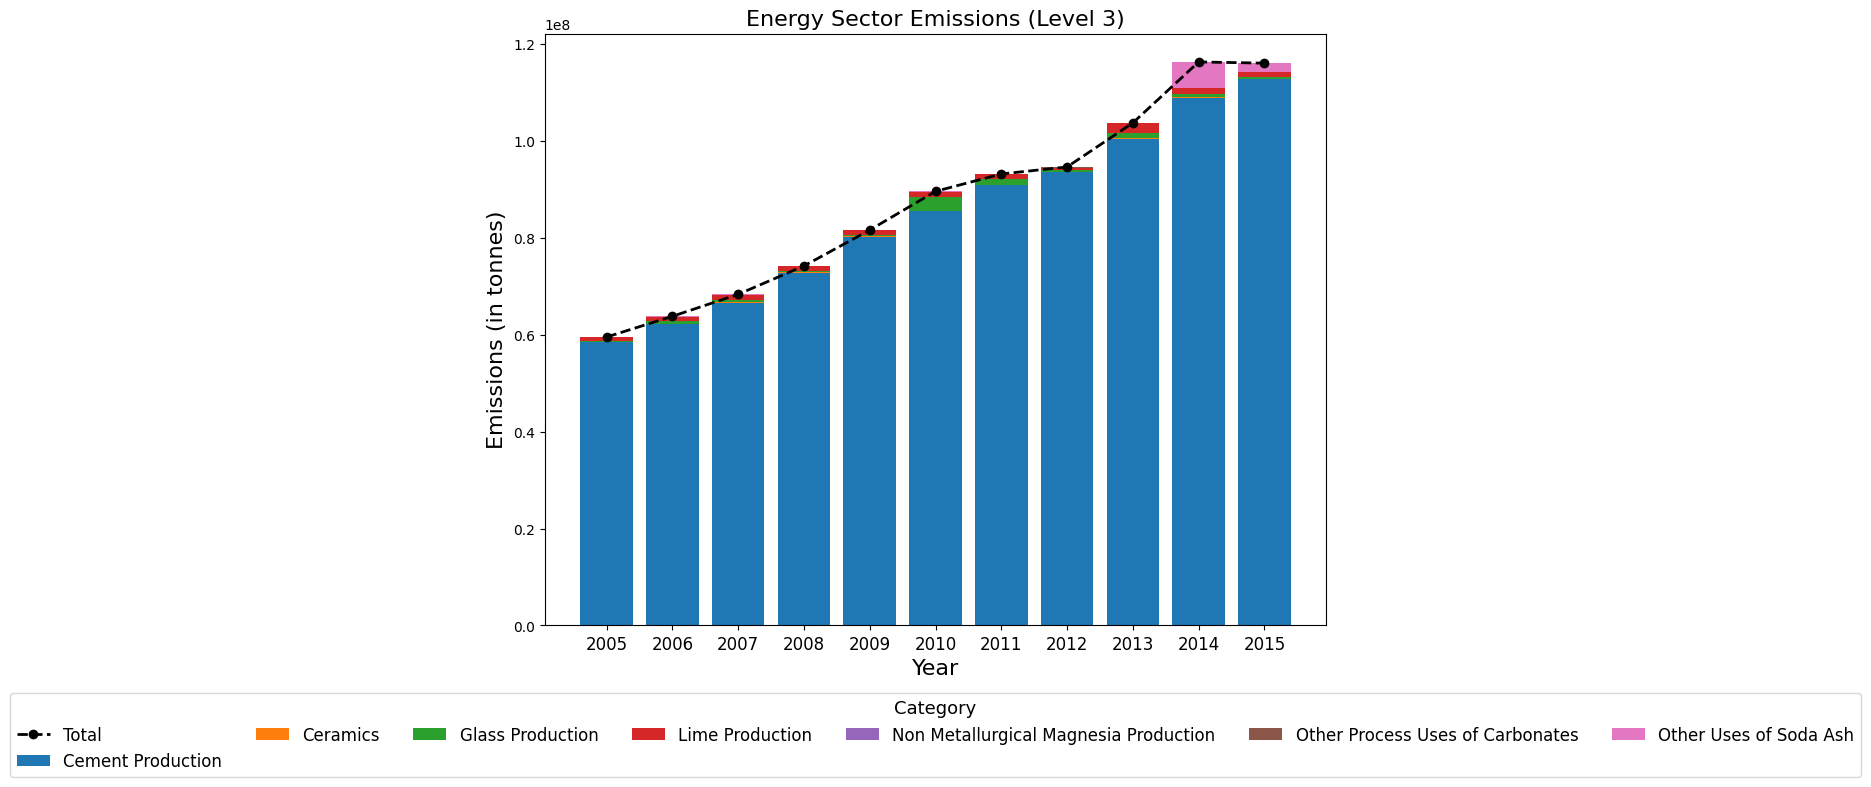

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Remove the 'Total' row for category-based plotting
category_df = ippu_mineral_industry_yearly_emissions[ippu_mineral_industry_yearly_emissions['Category'] != 'Total']

# Extract the "Total" row for line plotting
total_emissions = ippu_mineral_industry_yearly_emissions[ippu_mineral_industry_yearly_emissions['Category'] == 'Total']

# List of years
years = [str(year) for year in range(2005, 2016)]

# Prepare data for the stacked bar chart
category_data = category_df.set_index('Category')[years].T  # Transpose for stacking

# Sort the emission values by category size (from largest to smallest for each year)
category_data_sorted = category_data.apply(lambda row: row.sort_values(ascending=False), axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through the sorted data and stack the bars in order
for category in category_data_sorted.columns:
    ax.bar(
        years, 
        category_data_sorted[category], 
        bottom=bottom_values, 
        label=category
    )
    bottom_values += category_data_sorted[category]  # Update bottom values for the next stack

# Plot the total emissions as a line
total_emissions_data = total_emissions[years].values.flatten().astype(float)
ax.plot(
    years, 
    total_emissions_data, 
    color='black', 
    marker='o', 
    linestyle='--', 
    linewidth=2, 
    label='Total'
)

# Customizations
ax.set_title("Energy Sector Emissions (Level 3)", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Emissions (in tonnes)", fontsize=16)

# Increase x-axis tick size and make them horizontal
plt.xticks(range(len(years)), years, fontsize=12, rotation=0)  # Increase font size and set rotation to 0

# Move the legend below the plot
ax.legend(title="Category", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=7, title_fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()


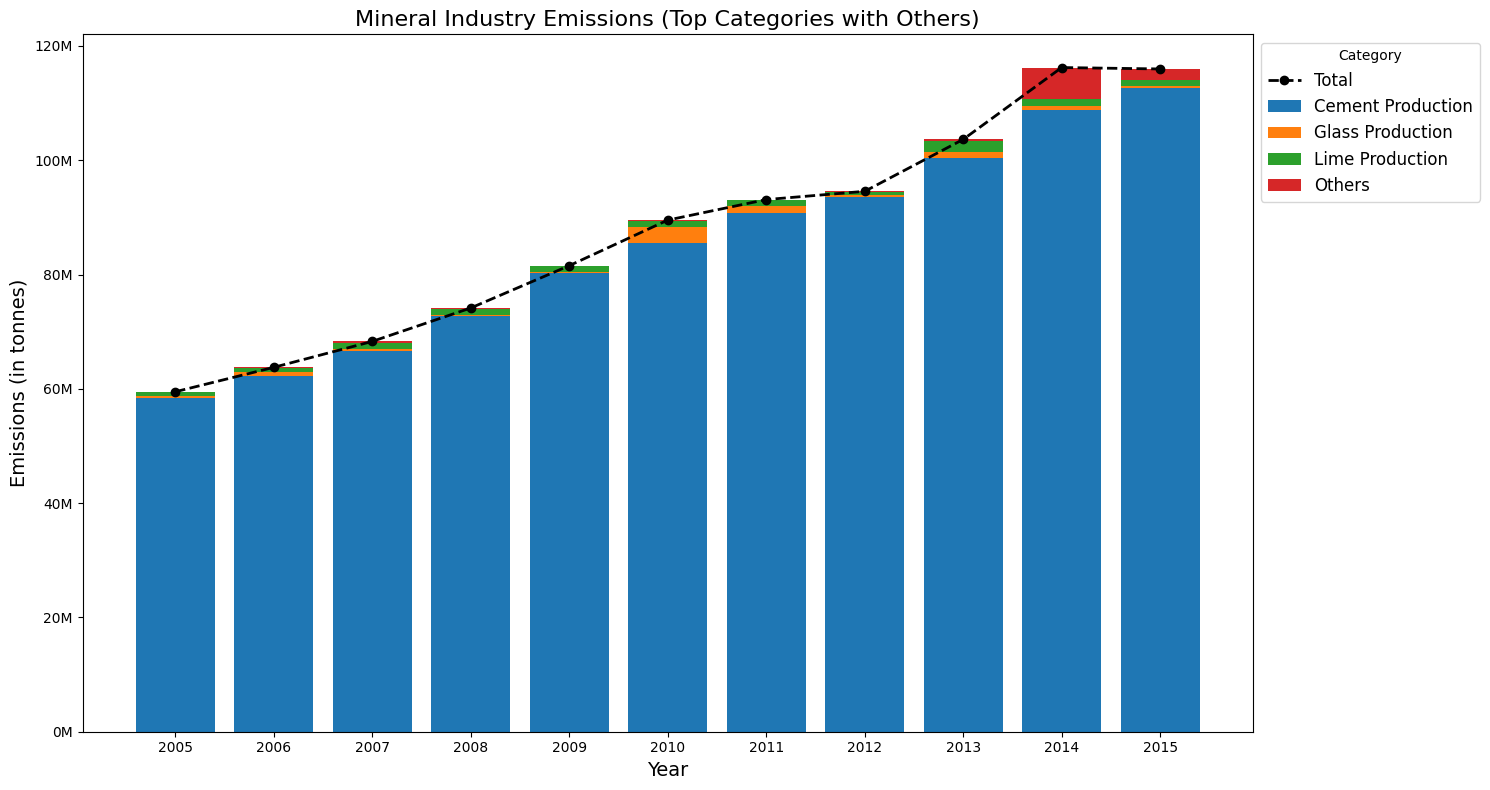

In [442]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Remove the 'Total' row for category-based plotting
category_df = ippu_mineral_industry_yearly_emissions[
    ippu_mineral_industry_yearly_emissions['Category'] != 'Total'
]

# Extract the "Total" row for line plotting
total_emissions = ippu_mineral_industry_yearly_emissions[
    ippu_mineral_industry_yearly_emissions['Category'] == 'Total'
]

# List of years
years = [str(year) for year in range(2005, 2016)]

# Calculate the total emissions for each category across all years
category_totals = category_df.set_index('Category')[years].sum(axis=1)

# Identify the top 3 categories
top_categories = category_totals.nlargest(3).index.tolist()

# Separate the top 3 categories
top_category_data = category_df[category_df['Category'].isin(top_categories)].set_index('Category')[years]

# Combine the remaining categories into 'Others'
others_data = category_df[~category_df['Category'].isin(top_categories)][years].sum()
top_category_data.loc['Others'] = others_data  # Add 'Others' as a new row

# Prepare data for plotting (transpose for stacking)
category_data = top_category_data.T

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through each category and stack the bars
for category in category_data.columns:
    ax.bar(
        years,
        category_data[category],
        bottom=bottom_values,
        label=category
    )
    bottom_values += category_data[category]  # Update bottom values for the next stack

# Plot the total emissions as a line
total_emissions_data = total_emissions[years].values.flatten().astype(float)
ax.plot(
    years,
    total_emissions_data,
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("Mineral Industry Emissions (Top Categories with Others)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Emissions (in tonnes)", fontsize=14)
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years, rotation=0)  # Set labels horizontal

# Automatically scale the y-axis based on data
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Format as '100M', '200M', etc.

# Add legend
ax.legend(title="Category", fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


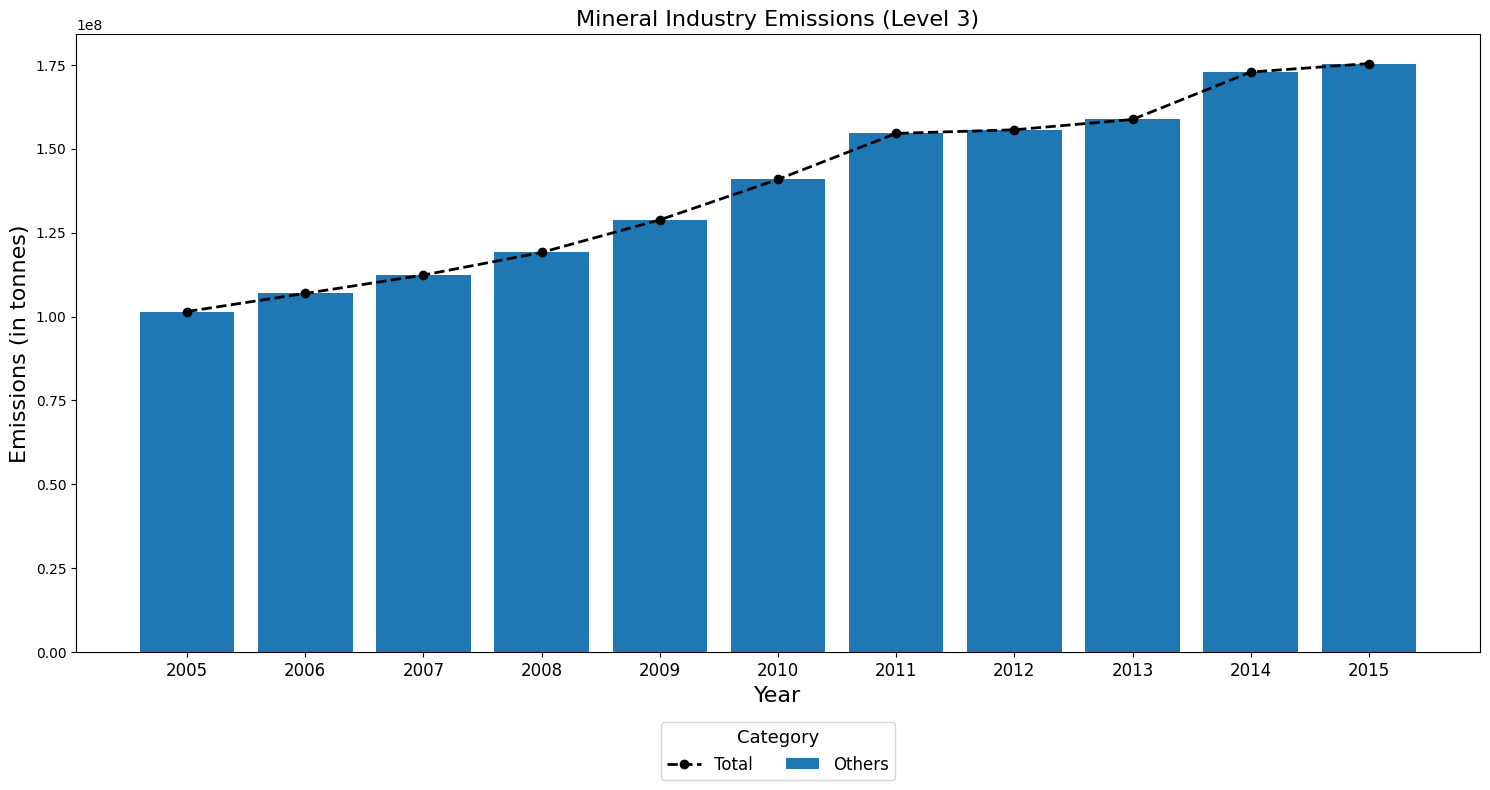

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the main categories to keep separate
main_categories = ["Cement Production", "Glass Production", "Lime Production"]

# Separate the main categories
main_categories_df = category_df[category_df['Category'].isin(main_categories)]

# Group the remaining categories into 'Others'
others_df = category_df[~category_df['Category'].isin(main_categories)]
others_sum = others_df[years].sum()  # Sum emissions across all 'Others'

# Create a new DataFrame for plotting
main_data = main_categories_df.set_index('Category')[years]  # Main categories
main_data.loc['Others'] = others_sum  # Add 'Others' as a new row

# Prepare data for the stacked bar chart
category_data = main_data.T  # Transpose for stacking

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through the data and stack the bars
for category in category_data.columns:
    ax.bar(
        years, 
        category_data[category], 
        bottom=bottom_values, 
        label=category
    )
    bottom_values += category_data[category]  # Update bottom values for the next stack

# Plot the total emissions as a line
total_emissions_data = total_emissions[years].values.flatten().astype(float)
ax.plot(
    years, 
    total_emissions_data, 
    color='black', 
    marker='o', 
    linestyle='--', 
    linewidth=2, 
    label='Total'
)

# Customizations
ax.set_title("Mineral Industry Emissions (Level 3)", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Emissions (in tonnes)", fontsize=16)

# Increase x-axis tick size and make them horizontal
plt.xticks(range(len(years)), years, fontsize=12, rotation=0)  # Increase font size and set rotation to 0

# Move the legend below the plot
ax.legend(title="Category", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, title_fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()


In [320]:



# List of columns representing the years 2005 to 2015
year_columns = [str(year) for year in range(2005, 2016)]

# Dictionary to store results for each category
category_sums = {}

# Calculate the summation for each category in 'Level 1'
for category in ippu_filtered_gwp_ar2['Level 3'].unique():
    # Filter rows for the current category
    category_df = ippu_filtered_gwp_ar2[ippu_filtered_gwp_ar2['Level 3'] == category]
    
    # Sum emissions for each year
    category_sums[category] = category_df[year_columns].sum()

# Convert the dictionary to a DataFrame for easier display and export
category_sums_df = pd.DataFrame(category_sums, index=year_columns).transpose()

# Add a row for the final summation for all categories
category_sums_df.loc['Total'] = category_sums_df.sum()

# Display the results
print(category_sums_df)

# Save the results to a CSV file
category_sums_df.to_csv('ippu_yearly_emissions_by_category_level3_and_total.csv')
print("Yearly emissions by category and totals saved to 'ippu_yearly_emissions_by_category_level3_and_total.csv'")

                                                        2005      2006  \
Acrylonitrile                                         164910    172080   
Ammonia Production                                  20164457  20281906   
Caprolactam, Glyoxal and Glyoxylic Acid Production    329918    334800   
Carbide Production                                     67829     93635   
Carbon Black                                         1519259   1612312   
Ethylene                                             4841996   4826756   
Ethylene Dichloride and Vinyl Chloride Monomer        102268     68302   
Ethylene Oxide                                       3297345   3614582   
Methanol                                              447502    454123   
Nitric Acid Production                                414655    288110   
Soda Ash Production                                   316778    294368   
Titanium Dioxide Production                            82556     86234   
Aluminium Production                  

In [ ]:


ippu_yearly_emissions_by_category_level3_and_total = pd.read_csv('ippu_yearly_emissions_by_category_level3_and_total.csv')

In [321]:
# Rename the unnamed column (assuming it's the first column)
ippu_yearly_emissions_by_category_level3_and_total = ippu_yearly_emissions_by_category_level3_and_total.rename(columns={ippu_yearly_emissions_by_category_level3_and_total.columns[0]: 'Category'})
ippu_yearly_emissions_by_category_level3_and_total

,Category,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Acrylonitrile,164910,172080,184030,154155,175665,182835,181640,163715,172080,166105,47800
1,Ammonia Production,20164457,20281906,19997136,19929927,20839580,21715825,21984704,22454959,22708063,22645217,24031926
2,"Caprolactam, Glyoxal and Glyoxylic Acid Produc...",329918,334800,264352,235755,315968,343170,332708,289462,246915,241335,240638
3,Carbide Production,67829,93635,105650,81692,36468,42933,67064,76816,84513,93588,92837
4,Carbon Black,1519259,1612312,1651919,1494626,1580483,1723366,1741587,1609938,1574553,1687276,1797439
5,Ethylene,4841996,4826756,4981402,4808378,4564978,4711108,5659156,5946036,5985482,5792286,6442697
6,Ethylene Dichloride and Vinyl Chloride Monomer,102268,68302,75554,81252,119288,133718,130166,102342,85100,362494,482451
7,Ethylene Oxide,3297345,3614582,4210604,4470161,5566072,6210159,6450491,6585076,7161871,7171485,7200324
8,Methanol,447502,454123,418372,306436,354435,419237,419208,324183,339181,270018,201109
9,Nitric Acid Production,414655,288110,433848,602850,601930,1149353,1997425,1124204,190401,13945,7404


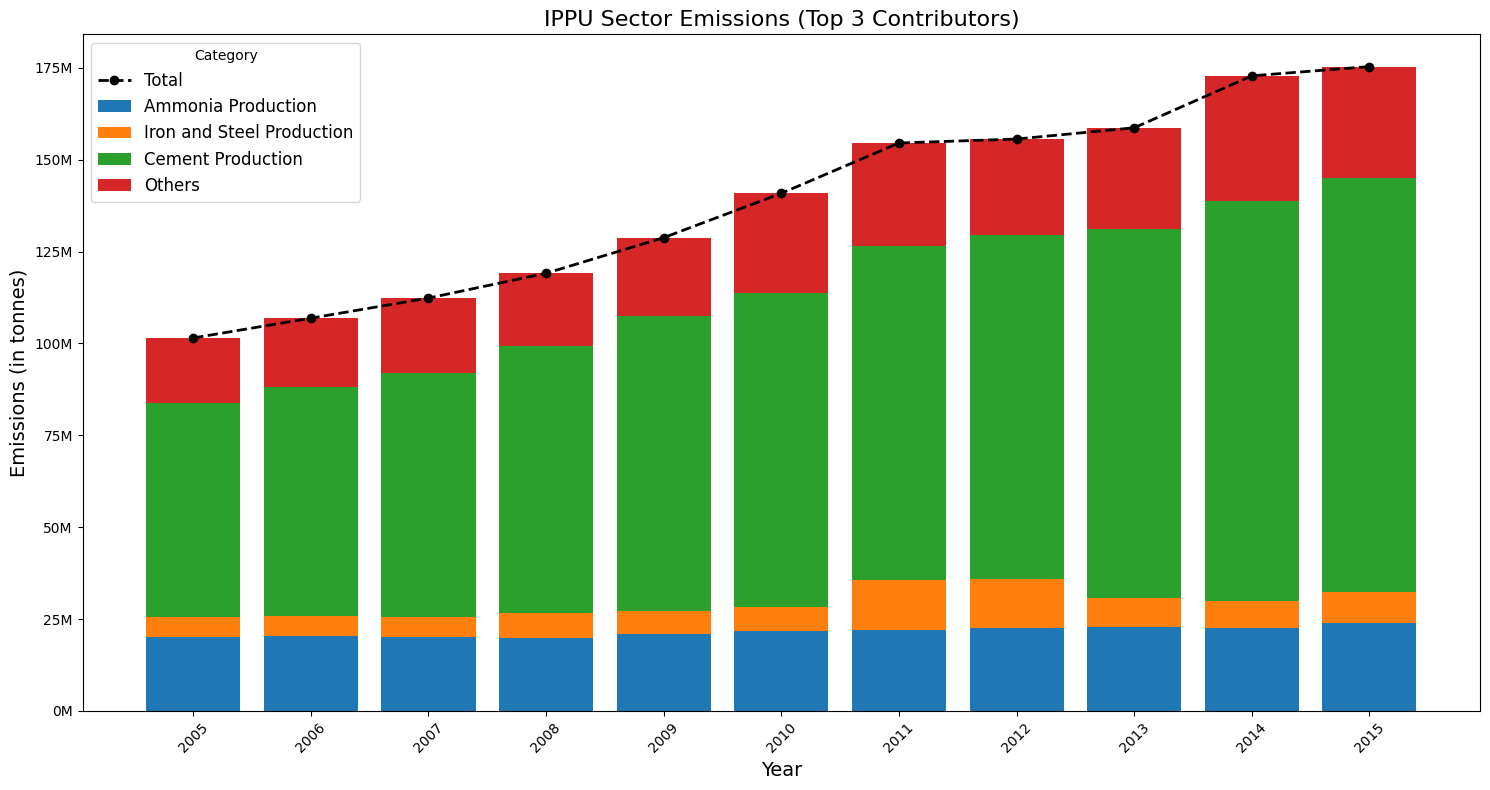

In [443]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Remove the 'Total' row for category-based plotting
category_df = ippu_yearly_emissions_by_category_level3_and_total[
    ippu_yearly_emissions_by_category_level3_and_total['Category'] != 'Total'
]

# Extract the "Total" row for line plotting
total_emissions = ippu_yearly_emissions_by_category_level3_and_total[
    ippu_yearly_emissions_by_category_level3_and_total['Category'] == 'Total'
]

# List of years
years = [str(year) for year in range(2005, 2016)]

# Calculate the total emissions for each category across all years
category_totals = category_df.set_index('Category')[years].sum(axis=1)

# Identify the top 3 categories
top_categories = category_totals.nlargest(3).index.tolist()

# Separate the top 3 categories
top_category_data = category_df[category_df['Category'].isin(top_categories)].set_index('Category')[years]

# Combine the remaining categories into 'Others'
others_data = category_df[~category_df['Category'].isin(top_categories)][years].sum()
top_category_data.loc['Others'] = others_data  # Add 'Others' as a new row

# Prepare data for plotting (transpose for stacking)
category_data = top_category_data.T

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through each category and stack the bars
for category in category_data.columns:
    ax.bar(
        years,
        category_data[category],
        bottom=bottom_values,
        label=category
    )
    bottom_values += category_data[category]  # Update bottom values for the next stack

# Plot the total emissions as a line
total_emissions_data = total_emissions[years].values.flatten().astype(float)
ax.plot(
    years,
    total_emissions_data,
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("IPPU Sector Emissions (Top 3 Contributors)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Emissions (in tonnes)", fontsize=14)
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years, rotation=45)

# Automatically scale the y-axis based on data
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Format as '100M', '200M', etc.

# Add legend
ax.legend(title="Category", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


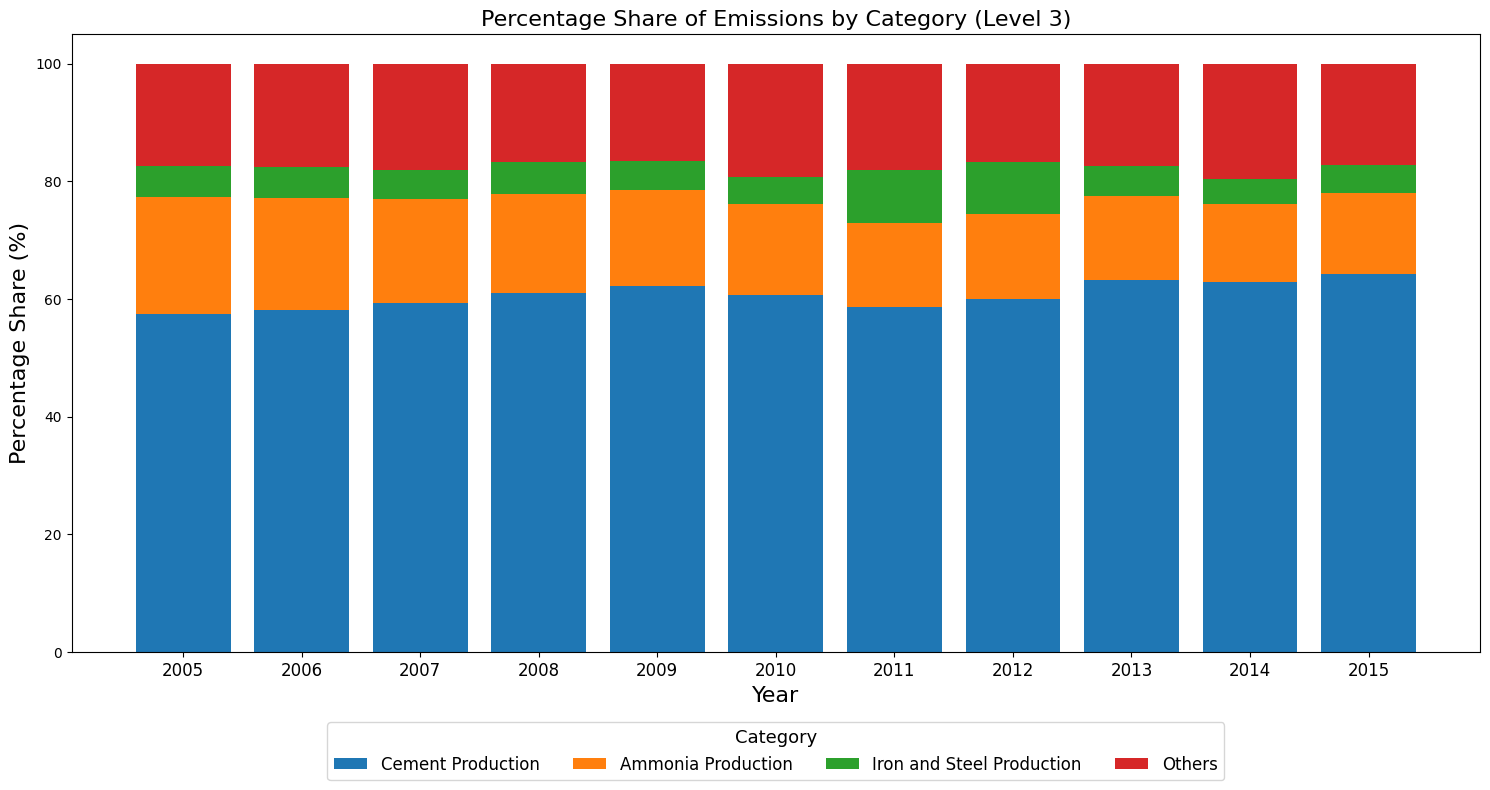

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the main categories in the required order
main_categories = ["Cement Production", "Ammonia Production", "Iron and Steel Production"]

# Separate the main categories
main_categories_df = category_df[category_df['Category'].isin(main_categories)]

# Group the remaining categories into 'Others'
others_df = category_df[~category_df['Category'].isin(main_categories)]
others_sum = others_df[years].sum()  # Sum emissions across all 'Others'

# Combine the main categories with 'Others'
main_data = main_categories_df.set_index('Category')[years]  # Main categories
main_data.loc['Others'] = others_sum  # Add 'Others'

# Reorder the categories to ensure the correct plotting order
main_data = main_data.loc[main_categories + ['Others']]  # Explicit order

# Calculate total emissions for each year
total_emissions_per_year = main_data.sum()

# Calculate percentage share for each category
percentage_data = (main_data / total_emissions_per_year) * 100  # Convert to percentages
percentage_data = percentage_data.T  # Transpose for plotting

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through each category in the desired order and plot the stacked bars
for category in main_categories + ['Others']:
    ax.bar(
        years,
        percentage_data[category],
        bottom=bottom_values,
        label=category
    )
    bottom_values += percentage_data[category]  # Update bottom values for the next stack

# Customizations
ax.set_title("Percentage Share of Emissions by Category in IPPU", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Percentage Share (%)", fontsize=16)
plt.xticks(range(len(years)), years, fontsize=12, rotation=0)  # Set x-axis ticks and make them horizontal

# Move the legend below the plot
ax.legend(title="Category", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, title_fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()


In [325]:
# List of columns representing the years 2005 to 2015
year_columns = [str(year) for year in range(2005, 2016)]

# Filter for 'Level 2' = 'Mineral Industry'
ippu_chemical_industry_df = ippu_filtered_gwp_ar2[ippu_filtered_gwp_ar2['Level 2'] == 'Chemical Industry']

# Dictionary to store results for each Level 3 category under Level 2 = 'Mineral Industry'
ippu_chemical_industry_sums = {}

# Calculate the summation for each Level 3 category
for category in ippu_chemical_industry_df['Level 3'].unique():
    # Filter rows for the current Level 3 category
    category_data = ippu_chemical_industry_df[ippu_chemical_industry_df['Level 3'] == category]
    
    # Sum emissions for each year
    ippu_chemical_industry_sums[category] = category_data[year_columns].sum()

# Convert the dictionary to a DataFrame for easier display and export
ippu_chemical_industry_sums_df = pd.DataFrame(ippu_chemical_industry_sums, index=year_columns).transpose()

# Add a row for the final summation for all Level 3 categories
ippu_chemical_industry_sums_df.loc['Total'] = ippu_chemical_industry_sums_df.sum()

# Display the results
print(ippu_chemical_industry_sums_df)

# Save the results to a CSV file
ippu_chemical_industry_sums_df.to_csv('ippu_chemical_industry_emissions_by_category_and_total.csv')
print("Emissions for 'Mineral Industry' by category and totals saved to 'ippu_chemical_industry_emissions_by_category_and_total.csv'")


                                                       2005     2006     2007  \
Acrylonitrile                                        164910   172080   184030   
Ammonia Production                                 20164457 20281906 19997136   
Caprolactam, Glyoxal and Glyoxylic Acid Production   329918   334800   264352   
Carbide Production                                    67829    93635   105650   
Carbon Black                                        1519259  1612312  1651919   
Ethylene                                            4841996  4826756  4981402   
Ethylene Dichloride and Vinyl Chloride Monomer       102268    68302    75554   
Ethylene Oxide                                      3297345  3614582  4210604   
Methanol                                             447502   454123   418372   
Nitric Acid Production                               414655   288110   433848   
Soda Ash Production                                  316778   294368   279263   
Titanium Dioxide Production 

In [326]:
ippu_chemical_industry_yearly_emissions = pd.read_csv('ippu_chemical_industry_emissions_by_category_and_total.csv')

In [327]:
# Rename the unnamed column (assuming it's the first column)
ippu_chemical_industry_yearly_emissions = ippu_chemical_industry_yearly_emissions.rename(columns={ippu_chemical_industry_yearly_emissions.columns[0]: 'Category'})
ippu_chemical_industry_yearly_emissions

,Category,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Acrylonitrile,164910,172080,184030,154155,175665,182835,181640,163715,172080,166105,47800
1,Ammonia Production,20164457,20281906,19997136,19929927,20839580,21715825,21984704,22454959,22708063,22645217,24031926
2,"Caprolactam, Glyoxal and Glyoxylic Acid Produc...",329918,334800,264352,235755,315968,343170,332708,289462,246915,241335,240638
3,Carbide Production,67829,93635,105650,81692,36468,42933,67064,76816,84513,93588,92837
4,Carbon Black,1519259,1612312,1651919,1494626,1580483,1723366,1741587,1609938,1574553,1687276,1797439
5,Ethylene,4841996,4826756,4981402,4808378,4564978,4711108,5659156,5946036,5985482,5792286,6442697
6,Ethylene Dichloride and Vinyl Chloride Monomer,102268,68302,75554,81252,119288,133718,130166,102342,85100,362494,482451
7,Ethylene Oxide,3297345,3614582,4210604,4470161,5566072,6210159,6450491,6585076,7161871,7171485,7200324
8,Methanol,447502,454123,418372,306436,354435,419237,419208,324183,339181,270018,201109
9,Nitric Acid Production,414655,288110,433848,602850,601930,1149353,1997425,1124204,190401,13945,7404


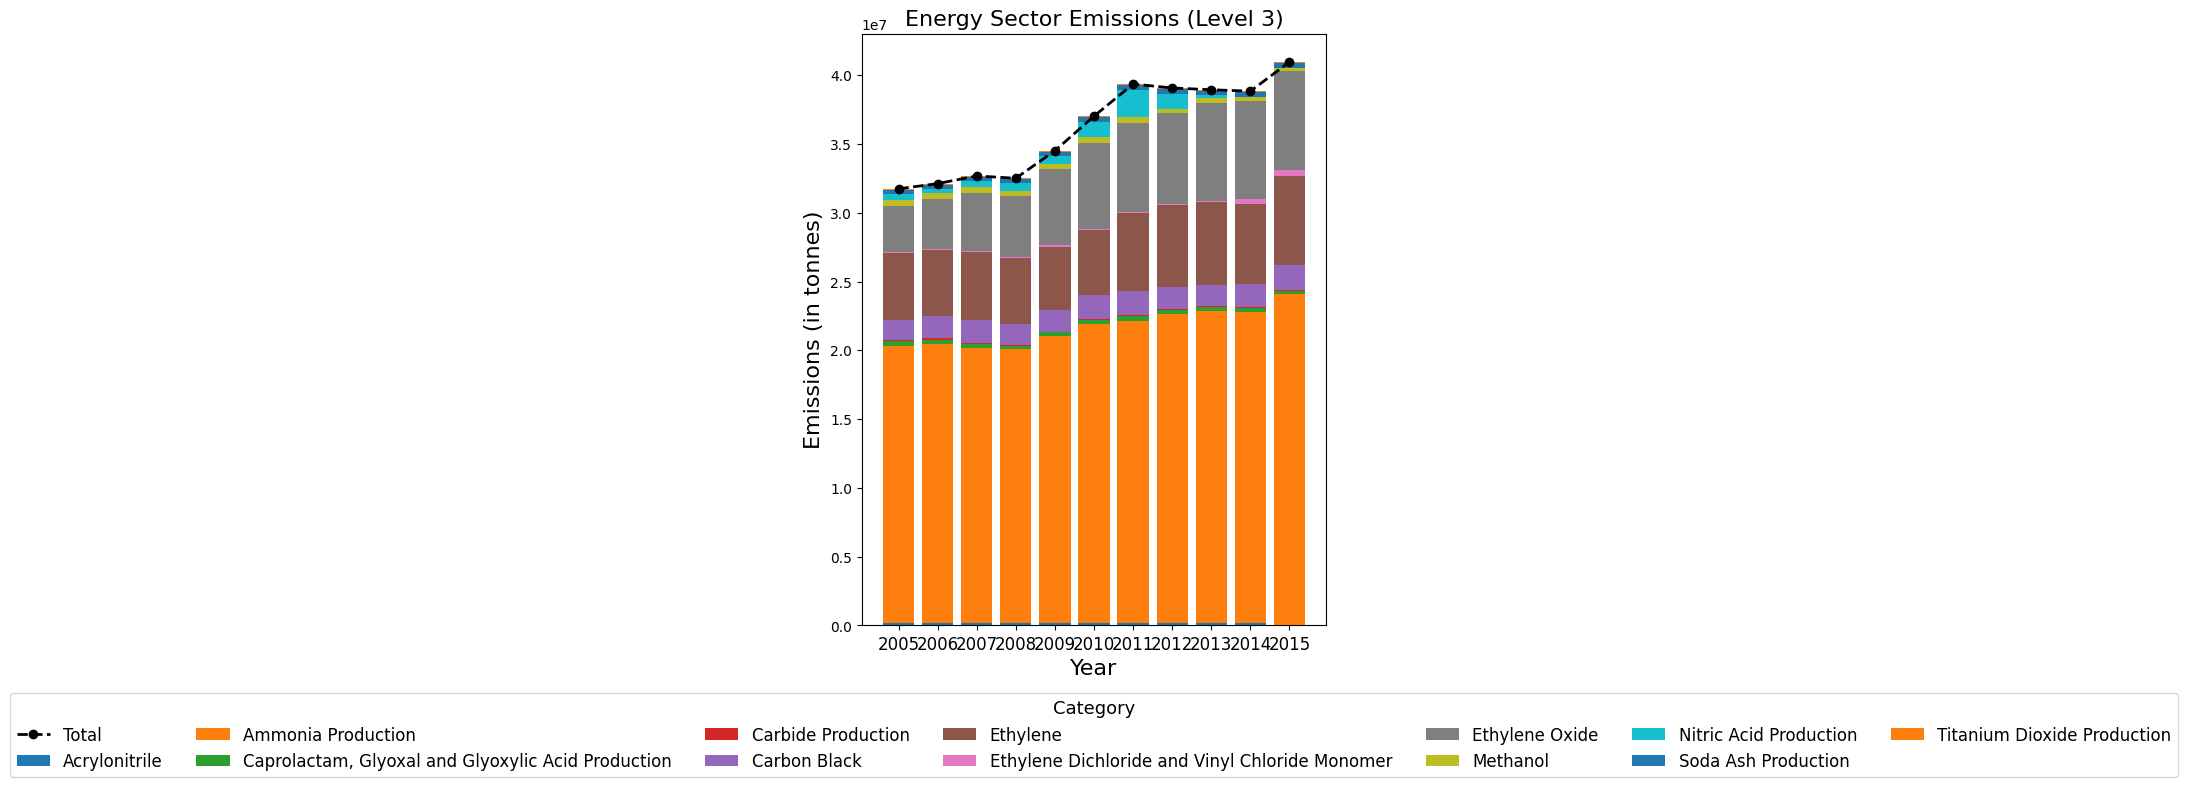

In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Remove the 'Total' row for category-based plotting
category_df = ippu_chemical_industry_yearly_emissions[ippu_chemical_industry_yearly_emissions['Category'] != 'Total']

# Extract the "Total" row for line plotting
total_emissions = ippu_chemical_industry_yearly_emissions[ippu_chemical_industry_yearly_emissions['Category'] == 'Total']

# List of years
years = [str(year) for year in range(2005, 2016)]

# Prepare data for the stacked bar chart
category_data = category_df.set_index('Category')[years].T  # Transpose for stacking

# Sort the emission values by category size (from largest to smallest for each year)
category_data_sorted = category_data.apply(lambda row: row.sort_values(ascending=False), axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through the sorted data and stack the bars in order
for category in category_data_sorted.columns:
    ax.bar(
        years, 
        category_data_sorted[category], 
        bottom=bottom_values, 
        label=category
    )
    bottom_values += category_data_sorted[category]  # Update bottom values for the next stack

# Plot the total emissions as a line
total_emissions_data = total_emissions[years].values.flatten().astype(float)
ax.plot(
    years, 
    total_emissions_data, 
    color='black', 
    marker='o', 
    linestyle='--', 
    linewidth=2, 
    label='Total'
)

# Customizations
ax.set_title("Energy Sector Emissions (Level 3)", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Emissions (in tonnes)", fontsize=16)

# Increase x-axis tick size and make them horizontal
plt.xticks(range(len(years)), years, fontsize=12, rotation=0)  # Increase font size and set rotation to 0

# Move the legend below the plot
ax.legend(title="Category", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=7, title_fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()


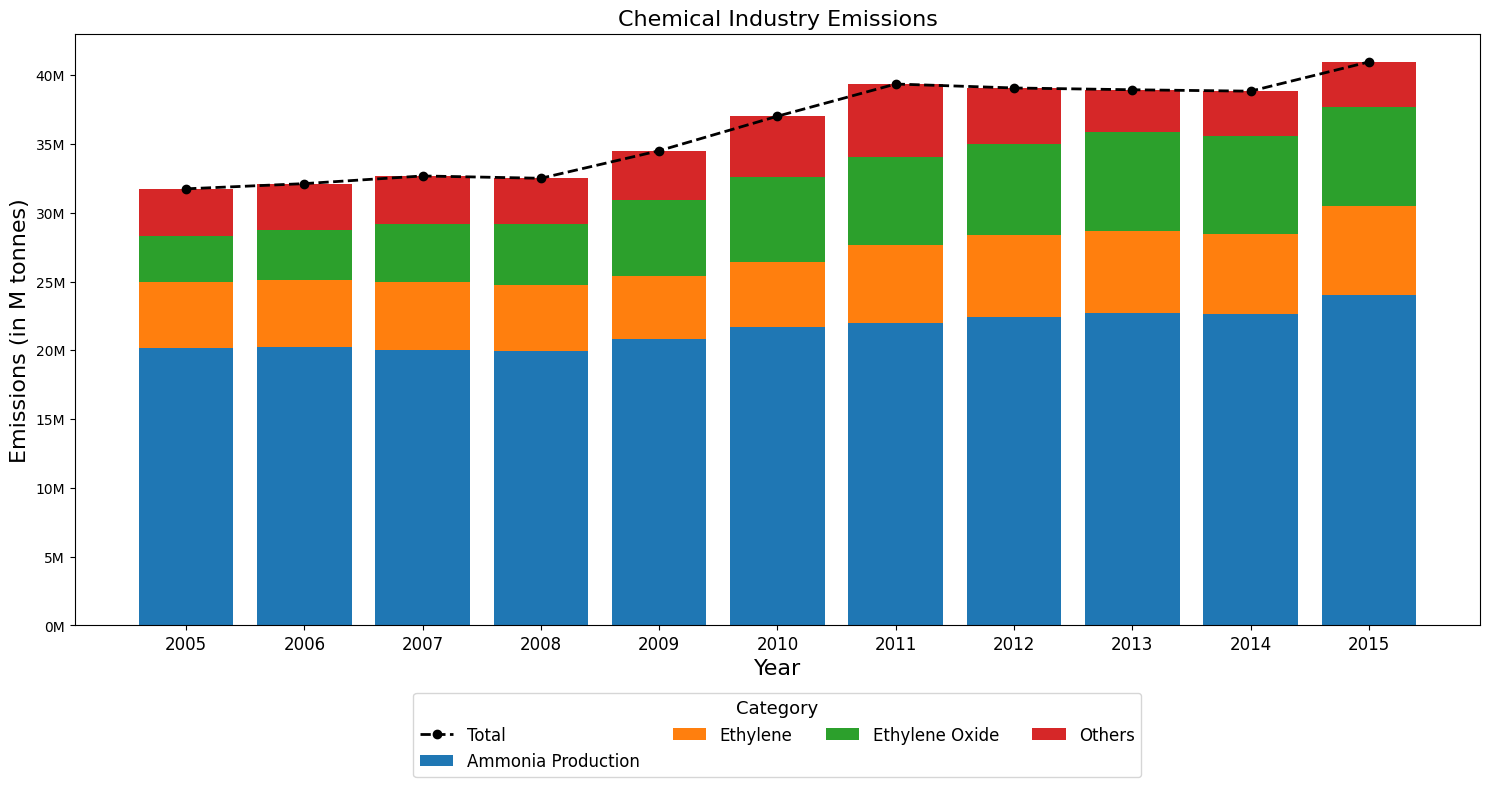

In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Remove the 'Total' row for category-based plotting
category_df = ippu_chemical_industry_yearly_emissions[ippu_chemical_industry_yearly_emissions['Category'] != 'Total']

# Extract the "Total" row for line plotting
total_emissions = ippu_chemical_industry_yearly_emissions[ippu_chemical_industry_yearly_emissions['Category'] == 'Total']

# List of years
years = [str(year) for year in range(2005, 2016)]

# Calculate the total emissions for each category across all years
category_totals = category_df.set_index('Category')[years].sum(axis=1)

# Identify the top 3 categories
top_categories = category_totals.nlargest(3).index.tolist()

# Separate the top 3 categories
top_category_data = category_df[category_df['Category'].isin(top_categories)].set_index('Category')[years]

# Combine the remaining categories into 'Others'
others_data = category_df[~category_df['Category'].isin(top_categories)][years].sum()
top_category_data.loc['Others'] = others_data  # Add 'Others' as a new row

# Prepare data for plotting (transpose for stacking)
category_data = top_category_data.T

# Sort columns (categories) for each year to stack in increasing order
category_data_sorted = category_data.apply(lambda x: x.sort_values(ascending=True), axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through each category and stack the bars in sorted order
for category in category_data_sorted.columns:
    ax.bar(
        years,
        category_data_sorted[category],
        bottom=bottom_values,
        label=category
    )
    bottom_values += category_data_sorted[category]  # Update bottom values for the next stack

# Plot the total emissions as a line
total_emissions_data = total_emissions[years].values.flatten().astype(float)
ax.plot(
    years,
    total_emissions_data,
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("Chemical Industry Emissions", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Emissions (in M tonnes)", fontsize=16)

# Increase x-axis tick size and make them horizontal
plt.xticks(range(len(years)), years, fontsize=12, rotation=0)

# Move the legend below the plot
ax.legend(title="Category", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, title_fontsize=13)

# Automatically scale the y-axis based on data
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Format as '100M', '200M', etc.

# Show the plot
plt.tight_layout()
plt.show()

In [334]:
# List of columns representing the years 2005 to 2015
year_columns = [str(year) for year in range(2005, 2016)]

# Filter for 'Level 2' = 'Mineral Industry'
ippu_metal_industry_df = ippu_filtered_gwp_ar2[ippu_filtered_gwp_ar2['Level 2'] == 'Metal Industry']

# Dictionary to store results for each Level 3 category under Level 2 = 'Mineral Industry'
ippu_metal_industry_sums = {}

# Calculate the summation for each Level 3 category
for category in ippu_metal_industry_df['Level 3'].unique():
    # Filter rows for the current Level 3 category
    category_data = ippu_metal_industry_df[ippu_metal_industry_df['Level 3'] == category]
    
    # Sum emissions for each year
    ippu_metal_industry_sums[category] = category_data[year_columns].sum()

# Convert the dictionary to a DataFrame for easier display and export
ippu_metal_industry_sums_df = pd.DataFrame(ippu_metal_industry_sums, index=year_columns).transpose()

# Add a row for the final summation for all Level 3 categories
ippu_metal_industry_sums_df.loc['Total'] = ippu_metal_industry_sums_df.sum()

# Display the results
print(ippu_metal_industry_sums_df)

# Save the results to a CSV file
ippu_metal_industry_sums_df.to_csv('ippu_metal_industry_emissions_by_category_and_total.csv')
print("Emissions for 'Mineral Industry' by category and totals saved to 'ippu_metal_industry_emissions_by_category_and_total.csv'")


                             2005    2006    2007    2008    2009    2010  \
Aluminium Production      1466891 1797304 2006400 2176867 2466235 2642928   
Ferroalloys Production          0       0       0       0       0       0   
Iron and Steel Production 5313879 5678948 5500328 6591780 6371205 6638405   
Lead Production             11324   20501   28517   31098   32926   30706   
Other                       10408   23024    6864     463     154     391   
Zinc Production            149328  190646  232620  292126  321108  375633   
Total                     6951830 7710422 7774730 9092335 9191629 9688064   

                              2011     2012     2013     2014     2015  
Aluminium Production       2715694  2811368  2772960  3195930  3750306  
Ferroalloys Production           0        0        0        0        0  
Iron and Steel Production 13761841 13566129  8017304  7336868  8354808  
Lead Production              43367    58117    63193    65523    73179  
Other             

In [335]:
ippu_metal_industry_yearly_emissions = pd.read_csv('ippu_metal_industry_emissions_by_category_and_total.csv')

In [336]:
# Rename the unnamed column (assuming it's the first column)
ippu_metal_industry_yearly_emissions = ippu_metal_industry_yearly_emissions.rename(columns={ippu_metal_industry_yearly_emissions.columns[0]: 'Category'})
ippu_metal_industry_yearly_emissions

,Category,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aluminium Production,1466891,1797304,2006400,2176867,2466235,2642928,2715694,2811368,2772960,3195930,3750306
1,Ferroalloys Production,0,0,0,0,0,0,0,0,0,0,0
2,Iron and Steel Production,5313879,5678948,5500328,6591780,6371205,6638405,13761841,13566129,8017304,7336868,8354808
3,Lead Production,11324,20501,28517,31098,32926,30706,43367,58117,63193,65523,73179
4,Other,10408,23024,6864,463,154,391,130,127,42,0,0
5,Zinc Production,149328,190646,232620,292126,321108,375633,409603,383764,398006,392850,398775
6,Total,6951830,7710422,7774730,9092335,9191629,9688064,16930635,16819504,11251505,10991171,12577068


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Remove the 'Total' row for category-based plotting
# category_df = ippu_metal_industry_yearly_emissions[ippu_metal_industry_yearly_emissions['Category'] != 'Total']

# # Extract the "Total" row for line plotting
# total_emissions = ippu_metal_industry_yearly_emissions[ippu_metal_industry_yearly_emissions['Category'] == 'Total']

# # List of years
# years = [str(year) for year in range(2005, 2016)]

# # Prepare data for the stacked bar chart
# category_data = category_df.set_index('Category')[years].T  # Transpose for stacking

# # Sort the emission values by category size (from largest to smallest for each year)
# category_data_sorted = category_data.apply(lambda row: row.sort_values(ascending=False), axis=1)

# # Plotting
# fig, ax = plt.subplots(figsize=(15, 8))

# # Create stacked bar chart
# bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# # Iterate through the sorted data and stack the bars in order
# for category in category_data_sorted.columns:
#     ax.bar(
#         years, 
#         category_data_sorted[category], 
#         bottom=bottom_values, 
#         label=category
#     )
#     bottom_values += category_data_sorted[category]  # Update bottom values for the next stack

# # Plot the total emissions as a line
# total_emissions_data = total_emissions[years].values.flatten().astype(float)
# ax.plot(
#     years, 
#     total_emissions_data, 
#     color='black', 
#     marker='o', 
#     linestyle='--', 
#     linewidth=2, 
#     label='Total'
# )

# # Customizations
# ax.set_title("Metal Industry Emissions (Level 3)", fontsize=16)
# ax.set_xlabel("Year", fontsize=16)
# ax.set_ylabel("Emissions (in tonnes)", fontsize=16)

# # Increase x-axis tick size and make them horizontal
# plt.xticks(range(len(years)), years, fontsize=12, rotation=0)  # Increase font size and set rotation to 0

# # Move the legend below the plot
# ax.legend(title="Category", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=7, title_fontsize=13)

# # Show the plot
# plt.tight_layout()
# plt.show()


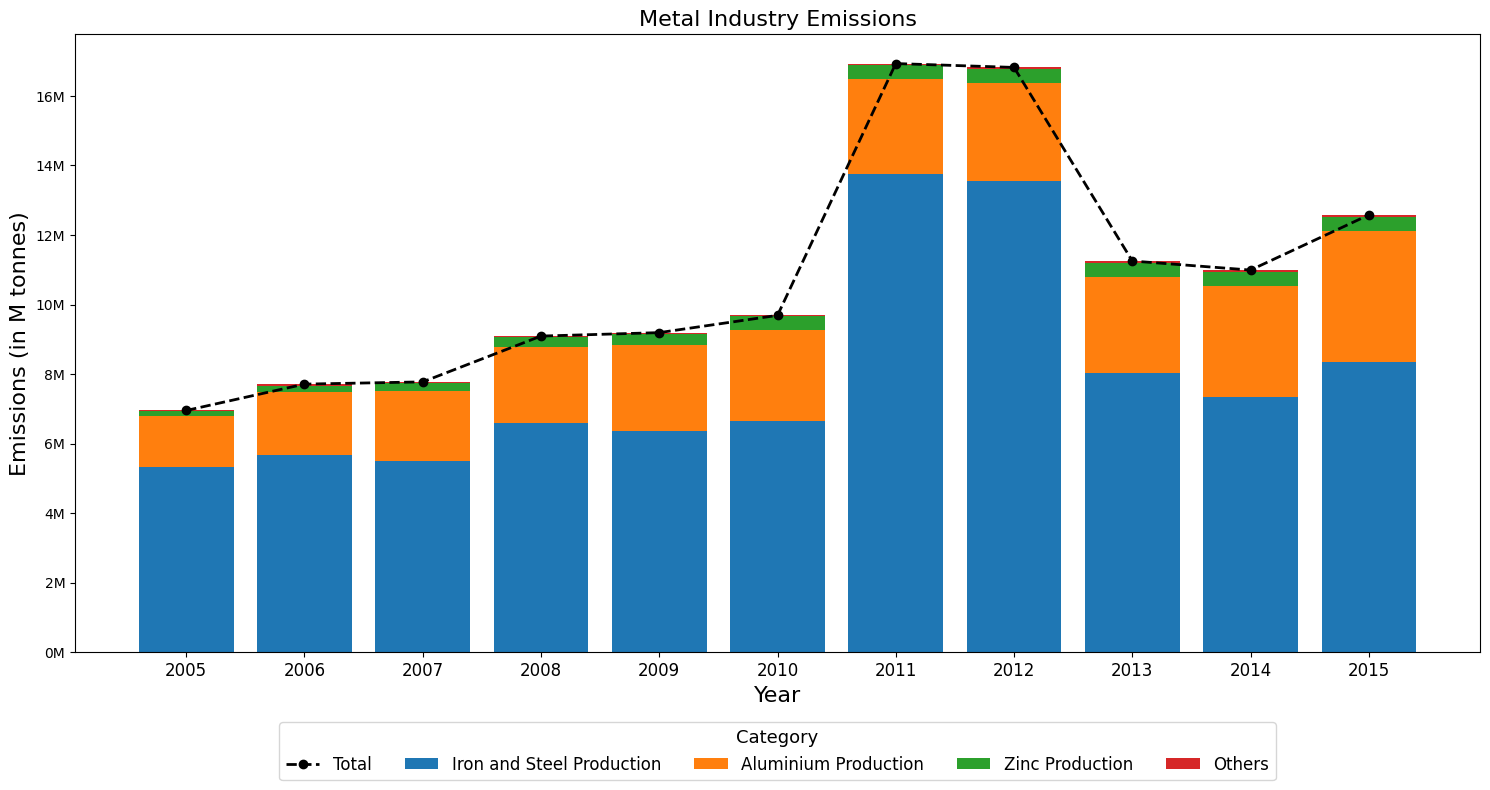

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Remove the 'Total' row for category-based plotting
category_df = ippu_metal_industry_yearly_emissions[ippu_metal_industry_yearly_emissions['Category'] != 'Total']

# Extract the "Total" row for line plotting
total_emissions = ippu_metal_industry_yearly_emissions[ippu_metal_industry_yearly_emissions['Category'] == 'Total']

# List of years
years = [str(year) for year in range(2005, 2016)]

# Calculate the total emissions for each category across all years
category_totals = category_df.set_index('Category')[years].sum(axis=1)

# Identify the top 3 categories
top_categories = category_totals.nlargest(3).index.tolist()

# Separate the top 3 categories
top_category_data = category_df[category_df['Category'].isin(top_categories)].set_index('Category')[years]

# Combine the remaining categories into 'Others'
others_data = category_df[~category_df['Category'].isin(top_categories)][years].sum()
top_category_data.loc['Others'] = others_data  # Add 'Others' as a new row

# Prepare data for the stacked bar chart (transpose for stacking)
category_data = top_category_data.T

# Sort the emission values by category size in increasing order for each year
category_data_sorted = category_data.apply(lambda row: row.sort_values(ascending=False), axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through sorted categories and stack the bars
for category in category_data_sorted.columns:
    ax.bar(
        years,
        category_data_sorted[category],
        bottom=bottom_values,
        label=category
    )
    bottom_values += category_data_sorted[category]  # Update bottom values for the next stack

# Plot the total emissions as a line
total_emissions_data = total_emissions[years].values.flatten().astype(float)
ax.plot(
    years,
    total_emissions_data,
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("Metal Industry Emissions", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Emissions (in M tonnes)", fontsize=16)

# Increase x-axis tick size and make them horizontal
plt.xticks(range(len(years)), years, fontsize=12, rotation=0)

# Move the legend below the plot
ax.legend(title="Category", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, title_fontsize=13)

# Automatically scale the y-axis based on data
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Format as '1M', '2M', etc.

# Show the plot
plt.tight_layout()
plt.show()
